

* [Loading and exploring the file](#load_file)



* [Bitcoin exploration](#bitcoin)

    * [Bitcoin trading volume on 10 Random Days](#10_rand)
    * [Bitcoin trading volume from the top 10 rows of the file](#top10)
    * [Doodles to get the functions right. aka SHOW YOUR WORK](#doodles)
    * [Function to calculate montly price movements](#moth_diff)
    

In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

print(os.listdir())

['consolidated_coin_data.csv', 'Untitled.ipynb', 'get_csv', '.ipynb_checkpoints']


<a id = 'load_file'></a> 

## Load and and look at the file


In [14]:


file = pd.read_csv('consolidated_coin_data.csv')

#  pd.to_datetime(raw_data['Mycol']
# file['Date'] = pd.to_datetime(file['Date'])
file.head()

/home/sanwal092/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,0x,11-Feb-18,1.09,1.09,0.934155,0.979054,"4,888,770","555,363,000"
1,0x,10-Feb-18,1.14,1.2,0.985705,1.1,"10,828,700","576,535,000"
2,0x,9-Feb-18,1.08,1.15,1.01,1.14,"5,979,420","545,842,000"
3,0x,8-Feb-18,0.988963,1.13,0.988963,1.07,"12,992,800","501,142,000"
4,0x,7-Feb-18,1.01,1.16,0.902145,0.993355,"13,476,600","513,163,000"


In [13]:
# file['Date']= file
# file= pd.to_datetime(file)

# file['Date'] = pd.to_datetime(file['Date'],format='%d-%b-%y')

# file['Date'].loc[[1]]

In [15]:
file.sample(5).dtypes

Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [16]:
# file.isnull().sum() # No null rows
# pd.isnull(file).any(axis = 1).sum() # no nan values in columns 
pd.isnull(file).any(axis = 0).sum()  # no NaN values in rows

0



## There are 5 cryptocurrencies in this file

In [17]:
file['Currency'].value_counts().head(5)

litecoin    1751
bitcoin     1751
peercoin    1750
ripple      1653
nxt         1531
Name: Currency, dtype: int64

<a id = "bitcoin"></a>

# BITCOIN 

In [18]:
pd_bitcoin = file[file['Currency']=='bitcoin']
pd_bitcoin = pd_bitcoin.drop(['Currency'], axis =1)


pd_bitcoin.Date = pd.to_datetime(pd_bitcoin['Date'], format = '%d-%b-%y')


pd_bitcoin.head(5)


,Date,Open,High,Low,Close,Volume,Market Cap
6478,2018-02-11,8616.13,8616.13,7931.1,8129.97,"6,122,190,000","145,245,000,000"
6479,2018-02-10,8720.08,9122.55,8295.47,8621.9,"7,780,960,000","146,981,000,000"
6480,2018-02-09,8271.84,8736.98,7884.71,8736.98,"6,784,820,000","139,412,000,000"
6481,2018-02-08,7637.86,8558.77,7637.86,8265.59,"9,346,750,000","128,714,000,000"
6482,2018-02-07,7755.49,8509.11,7236.79,7621.3,"9,169,280,000","130,683,000,000"


In [19]:
max_val = int(pd_bitcoin['Volume'].head(100).max().replace(',',''))
min_val = int(pd_bitcoin['Volume'].head(100).min().replace(',',''))
print(max_val, min_val)
min_val<max_val

9959400000 10291200000


False

## In the following cell, I am creating a variable called y_vals. You can use this if you need to set the y-ticks of the graphs.

In [20]:

# This cell is to create y-ticks if need be....

y_vals = np.arange(int(max(pd_bitcoin['Volume'].head(100)).replace(',','')),int(min(pd_bitcoin['Volume'].head(100)).replace(',',''))
 )


## These are just doodles to get the above statement right.
# maxi = int(max(pd_bitcoin['Volume'].head(100)).replace(',',''))
# mini =int(min(pd_bitcoin['Volume'].head(100)).replace(',',''))

# print(maxi, mini)
# mini<maxi


<a id = '10_rand'></a>

## In the following cell, I am plotting the day vs volume graphs of 10 random days picked from the file

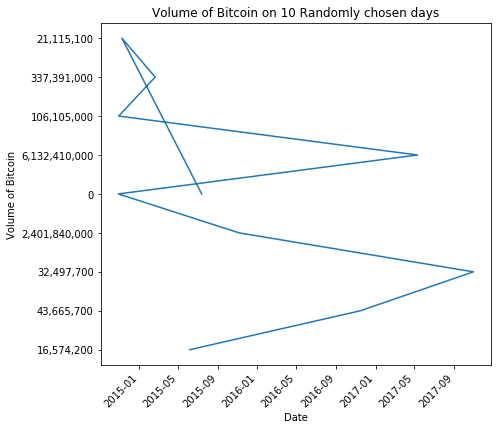

In [26]:
fig = plt.figure(figsize= (7,7))

# plt.plot(pd_bitcoin.Date.head(10), pd_bitcoin.Volume.head(10))
plt.plot(pd_bitcoin.Date.sample(10), pd_bitcoin.Volume.sample(10))
fig.autofmt_xdate(rotation = 45)
plt.title('Volume of Bitcoin on 10 Randomly chosen days')
plt.xlabel('Date')
plt.ylabel('Volume of Bitcoin')
plt.show(fig)

<a id = 'top10'></a>

## In the following cell, I am plotting the day vs volume graphs of of the top 10 columns in the file 

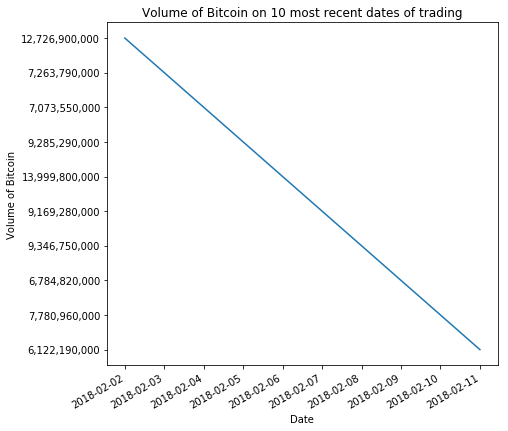

In [27]:
fig = plt.figure(figsize= (7,7))

plt.plot(pd_bitcoin.Date.head(10), pd_bitcoin.Volume.head(10))
# plt.plot(pd_bitcoin.Date.sample(10), pd_bitcoin.Volume.sample(10))
fig.autofmt_xdate()
plt.title('Volume of Bitcoin on 10 most recent dates of trading')
plt.xlabel('Date')
plt.ylabel('Volume of Bitcoin')
plt.show(fig)

<a id = 'doodles'></a>

# Doodlees to get things right for the function 'month_diff'

In [30]:
pd_dhl = pd_bitcoin[['Date','High','Low']]

# pd_month_jan =  pd_month.loc[]
mask = (pd_dhl['Date'] >'2017-01') & (pd_dhl['Date'] <= '2017-12-31')
mask

pd_2k17 = pd_dhl.loc[mask]
# pd_2k17['Date ']=pd_2k17['Date'].astype(str)
# pd_dhl['Date'] =pd.DatetimeIndex(pd_dhl['Date'])
# df_month.head()
# df_month.sample(10)
# df_month
# pd_dhl.head()
# pd_dhl.dtypes

pd_2k17.head()
pd_2k17.dtypes

Date    datetime64[ns]
High            object
Low             object
dtype: object

In [41]:
# test = pd_2k17['Date'].index.isin(['2017-01'])
# test
# pd_2k17[pd_2k17['Date'].dt.date.astype(str).contains('2017-01')]
# pd_2k17[pd_2k17['Date'].month == '02']
# pd_2k17.index

# pd_2k17 = pd_2k17.loc['2017-01']
pd_2k17['Date'] = pd.to_datetime(pd_2k17['Date'])
# pd_2k17['Date'].dt.month
# pd_2k17.head(10)

pd_test = pd_2k17[pd_2k17['Date'].dt.month==1]
pd_test

/home/sanwal092/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,High,Low
6854,2017-01-31,972.02,920.96
6855,2017-01-30,923.05,919.47
6856,2017-01-29,923.42,919.15
6857,2017-01-28,923.91,919.81
6858,2017-01-27,923.22,915.85
6859,2017-01-26,919.33,902.22
6860,2017-01-25,903.25,891.69
6861,2017-01-24,924.14,892.29
6862,2017-01-23,928.27,916.74
6863,2017-01-22,937.52,897.56


In [67]:
from datetime import datetime

year = '2017'

year_str= str(year)
begin_year = datetime.strptime(year_str+'-01-01', '%Y-%m-%d')
end_year = datetime.strptime(year_str+'-12-31','%Y-%m-%d')
print('year:', year_str)
print('begin:', begin_year)
print('end:', end_year)


year: 2017
begin: 2017-01-01 00:00:00
end: 2017-12-31 00:00:00


<a id = 'moth_diff'></a>

# <font color = 'blue'> FUNCTION TO CALCULATE MONTHLY DIFFRENCE FOR BITCOIN</font>
## <font color = 'green'> the function is called month_diff and it takes in two arguments: </font>

* df = dataFrame containing all the information about a cryptocurrency created earliers.
* year = The year you want to look at as a string. 


## <font color = 'green'>In the following function, I am doing the following things: </font>

** * Taking a DataFrame for a cryptocurrency (bitcoin in this example) and the year you want to look at.   **

** * Creating date time objects for the begining and end of the year in question, **

** * Looping over the crypto dataFrame, filtering out each month of year, one by one. **

** * Finding the maximum and minumum values for the cryptocurrency for that month **

** * Then storing the value of that difference with Year-Month as the key to a dictionary. **

** * Port that dictionary over as a dataFrame using Pandas from_dict function **


In [95]:

# high_low= pd_month[['Date','High','Low']]
# max_month = int(float(high_low['High'].max()))
# min_month = int(float(high_low['High'].min()))

# diff_month = max_month-min_month  

# print(min_month, max_month)
# print(diff_month)

In [80]:
from datetime import datetime
def month_diff(df, year):
    
    month_move= {}
    year_str= str(year)
    begin_year = datetime.strptime(year_str+'-01-01', '%Y-%m-%d')
    end_year = datetime.strptime(year_str+'-12-31','%Y-%m-%d')
#     mask = (pd_dhl['Date'] >'2017-01') & (pd_dhl['Date'] <= '2017-12-31')
    mask = (df['Date']>(begin_year)) & (df['Date']<=end_year)
    df = df.loc[mask]
        
    high_low = df[['Date','High','Low']]
    high_low['Date'] =pd.to_datetime(high_low['Date'])
    
#     Calculate the difference between the min and max of that month
    for x in range(1,13):
        month_df = high_low[high_low['Date'].dt.month==x]
        max_month = int(float(month_df['High'].max()))
        min_month = int(float(month_df['High'].min()))
        diff_month = max_month-min_month  # calculate the difference in the month's movement
        
        key = year_str+'-'+str(x)
        
        if key in month_move:
            continue
        else:
            month_move[key] = diff_month
    year_df = pd.DataFrame.from_dict(month_move, orient = 'index').reset_index()
    year_df.columns = ['Year-month', 'point change']
    return year_df
#     return month_move

change_2k17 = month_diff(pd_bitcoin, year= '2017')

/home/sanwal092/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


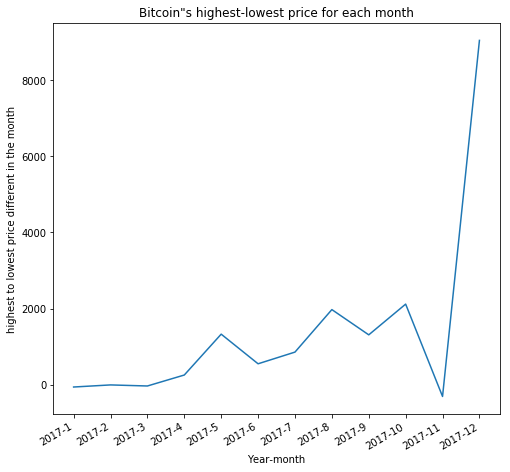

In [94]:
# change_2k17.plot(x = 'Year-month', y= 'point change', kind = 'line')
# plt.show()

# sns.lmplot('Year-month', 'point change', data=change_2k17, fit_reg = True )

fig = plt.figure(figsize= (8,8))

plt.plot(change_2k17['Year-month'], change_2k17['point change'])
fig.autofmt_xdate()
plt.xlabel('Year-month')
plt.ylabel('highest to lowest price different in the month')
plt.title('Bitcoin"s highest-lowest price for each month')

plt.show(fig)
